In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [2]:
accounts = pd.read_csv("https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/DS%20II%20-%20Final%20Dataset.csv")
accounts

,Acc #,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,59706132,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,94828583,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,31566094,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,66750139,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,74126192,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,14789075,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,37596814,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,15749982,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,61411679,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


In [3]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149176 entries, 0 to 149175
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Acc #                                     149176 non-null  int64  
 1   Games Attended                            149176 non-null  int64  
 2   Seat Qty                                  149176 non-null  int64  
 3   Net Revenue                               149176 non-null  float64
 4   Most Common Section                       149176 non-null  object 
 5   Region                                    149176 non-null  object 
 6   Gender                                    149176 non-null  object 
 7   Age                                       149176 non-null  int64  
 8   City                                      149176 non-null  object 
 9   Area                                      149176 non-null  object 
 10  avg days before game

In [4]:
print(accounts.columns)

Index(['Acc #', 'Games Attended', 'Seat Qty', 'Net Revenue',
       'Most Common Section', 'Region', 'Gender', 'Age', 'City', 'Area',
       'avg days before game ticket is purchased', 'Ticket Purchase Source',
       'Distance from Stadium', 'Discount Usage',
       'Days Since Last Game Attended', 'Most Common Game Day',
       'Subscribed to Email List'],
      dtype='object')


# Data Preparation

In [5]:
# Dropped Account ID Variable
accounts.drop('Acc #', axis=1, inplace=True)
accounts

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

,Games Attended,Seat Qty,Net Revenue,Most Common Section,Region,Gender,Age,City,Area,avg days before game ticket is purchased,Ticket Purchase Source,Distance from Stadium,Discount Usage,Days Since Last Game Attended,Most Common Game Day,Subscribed to Email List
0,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,25,Scarborough,Greater Toronto Area,2,App,31,0,158,Saturday,0
1,1,2,540.0,Defensive Ends,Downtown Toronto (Richmond/Adelaide/King),M,57,Toronto,Downtown Toronto,3,Website,11,0,157,Saturday,1
2,1,2,540.0,Defensive Ends,Scarborough (Guildwood),F,48,Scarborough,Greater Toronto Area,1,App,30,0,159,Tuesday,0
3,1,2,507.0,Attacking Ends,Scarborough (Guildwood),M,52,Scarborough,Greater Toronto Area,2,Website,23,0,124,Saturday,0
4,4,8,2184.0,Attacking Corner,Etobicoke (South Steeles),F,31,Etobicoke,Greater Toronto Area,15,App,30,0,40,Friday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149171,4,8,1520.0,UB - Defensive End,Downtown Toronto (St. James Town),F,56,Toronto,Downtown Toronto,6,App,34,0,88,Tuesday,0
149172,2,4,760.0,UB - Defensive End,Hamilton (Waterdown),M,36,Toronto,Greater Toronto Area,2,App,32,1,159,Wednesday,0
149173,5,10,1450.0,Standing Room Only,Scarborough (Golden Mile),M,59,Scarborough,Greater Toronto Area,2,Website,5,0,128,Friday,0
149174,1,2,430.0,UB - Attacking Corner,Hamilton (Southam / Bonnington / Yeoville / Ke...,M,53,Toronto,Downtown Toronto,6,Website,42,0,9,Friday,0


In [6]:
accounts['Area'].value_counts()

Area
Greater Toronto Area    92168
Downtown Toronto        28792
Outside GTA             28216
Name: count, dtype: int64

In [7]:
def area_categorical(x):
    if x == 'Greater Toronto Area':
        return 1
    elif x == 'Downtown Toronto':
        return 2
    elif x == 'Outside GTA':
        return 3
    else:
        return 0

In [8]:
accounts['area_categorical'] = accounts['Area'].apply(area_categorical)

In [9]:
accounts['City'].value_counts()

City
Toronto          86551
Scarborough      12115
North York       11054
Mississauga       6991
Markham           6253
Hamilton          5561
Brampton          5504
Etobicoke         4745
Richmond Hill     1399
East York         1103
Bowmanville        982
Newmarket          716
Pickering          659
Welland            654
Vaughan            648
King City          402
Stouffville        399
Ajax               383
Caledon            378
Bolton             370
Fort Erie          363
Midland            353
Niagara Falls      328
Woodbridge         328
Milton             328
Keswick            318
Port Hope          291
Name: count, dtype: int64

In [10]:
def city_categorical(city):
    if city in ['Toronto', 'Scarborough', 'North York', 'Etobicoke', 'East York']:
        return 1  # Greater Toronto Area
    elif city in ['Downtown Toronto']:
        return 2  # Downtown Toronto
    elif city in ['Mississauga', 'Markham', 'Brampton', 'Hamilton', 'Richmond Hill', 'Vaughan']:
        return 3  # Outside GTA - Major surrounding cities
    else:
        return 4  # Other locations outside GTA

accounts['city_categorical'] = accounts['City'].apply(city_categorical)

In [11]:
accounts['Most Common Section'].value_counts()

Most Common Section
Defensive Ends              21485
Attacking Corner            21312
Defensive Corner - Upper    21303
Attacking Ends              21245
UB - Attacking Corner        7219
UB - Defensive Corner        7175
UB - Defensive End           7124
UB - Club                    7120
UB - Attacking End           7036
Standing Room Only           6948
Blue Line                    4363
Club Platinum                4280
Family Zone                  4238
Club Rinkside                4142
Club Gold                    2124
Club Glass                   2062
Name: count, dtype: int64

In [12]:
def mcs_categorical(section):
    if section == 'Defensive Ends':
        return 1
    elif section == 'Attacking Corner':
        return 2
    elif section == 'Defensive Corner - Upper':
        return 3
    elif section == 'Attacking Ends':
        return 4
    elif section == 'UB - Attacking Corner':
        return 5
    elif section == 'UB - Defensive Corner':
        return 6
    elif section == 'UB - Defensive End':
        return 7
    elif section == 'UB - Attacking End':
        return 8
    elif section == 'Standing Room Only':
        return 9
    elif section == 'Blue Line':
        return 10
    elif section in ['UB - Club', 'Club Platinum', 'Club Rinkside', 'Club Gold', 'Club Glass']:
        return 11
    elif section == 'Family Zone':
        return 12
    else:
        return 0  

# Apply the function to create the categorical mapping
accounts['mcs_categorical'] = accounts['Most Common Section'].apply(mcs_categorical)

print(accounts['mcs_categorical'].value_counts())

mcs_categorical
1     21485
2     21312
3     21303
4     21245
11    19728
5      7219
6      7175
7      7124
8      7036
9      6948
10     4363
12     4238
Name: count, dtype: int64


In [13]:
accounts['Most Common Section'].value_counts()

Most Common Section
Defensive Ends              21485
Attacking Corner            21312
Defensive Corner - Upper    21303
Attacking Ends              21245
UB - Attacking Corner        7219
UB - Defensive Corner        7175
UB - Defensive End           7124
UB - Club                    7120
UB - Attacking End           7036
Standing Room Only           6948
Blue Line                    4363
Club Platinum                4280
Family Zone                  4238
Club Rinkside                4142
Club Gold                    2124
Club Glass                   2062
Name: count, dtype: int64

In [14]:
accounts['Ticket Purchase Source'].value_counts()

Ticket Purchase Source
App          82096
Website      59400
In-Person     7680
Name: count, dtype: int64

In [15]:
def purchase_source_categorical(x):
    if x == 'App':
        return 1
    elif x == 'Website':
        return 2
    elif x == 'In-Person':
        return 3
    else:
        return 0
    
accounts['purchase_source_categorical'] = accounts['Ticket Purchase Source'].apply(purchase_source_categorical)

In [16]:
def gender_categorical(x):
    if x == 'M':
        return 1
    elif x == 'F':
        return 2
    elif x == 'N/A':
        return 3
    else:
        return 0
    
accounts['gender_categorical'] = accounts['Gender'].apply(gender_categorical)

In [17]:
def game_day_categorical(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 1
    elif day == 'Friday':
        return 2
    elif day == 'Saturday':
        return 3
    elif day == 'Sunday':
        return 4
    else:
        return 0  # Unknown or other values
    
accounts['game_day_categorical'] = accounts['Most Common Game Day'].apply(game_day_categorical)

In [18]:
def ticket_purchase_bucket(days):
    if days == 1:
        return 'Game Day'
    elif 2 <= days <= 4:
        return '1-3 Days Before'
    elif 5 <= days <= 8:
        return '1 Week Before'
    elif 9 <= days <= 30:
        return 'Over 1 Week Before'
    elif days >= 31:
        return 'Over 1 Month In-Advance'
    else:
        return 'Unknown'

accounts['Avg Purchase Time'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket)

# To see the distribution of the buckets
print(accounts['Avg Purchase Time'].value_counts())

Avg Purchase Time
1-3 Days Before            57705
1 Week Before              43523
Game Day                   26362
Over 1 Week Before         16832
Over 1 Month In-Advance     4754
Name: count, dtype: int64


In [19]:
def ticket_purchase_bucket_numeric(days):
    if days == 1:
        return 1  # Game Day
    elif 2 <= days <= 4:
        return 2  # 1-3 Days Before
    elif 5 <= days <= 8:
        return 3  # 1 Week Before
    elif 9 <= days <= 30:
        return 4  # Over 1 Week Before
    elif days >= 31:
        return 5  # Over 1 Month In-Advance
    else:
        return 0  # Unknown

accounts['Avg Purchase Time Encoded'] = accounts['avg days before game ticket is purchased'].apply(ticket_purchase_bucket_numeric)

# To see the distribution of the numerical mapping
print(accounts['Avg Purchase Time Encoded'].value_counts())

Avg Purchase Time Encoded
2    57705
3    43523
1    26362
4    16832
5     4754
Name: count, dtype: int64


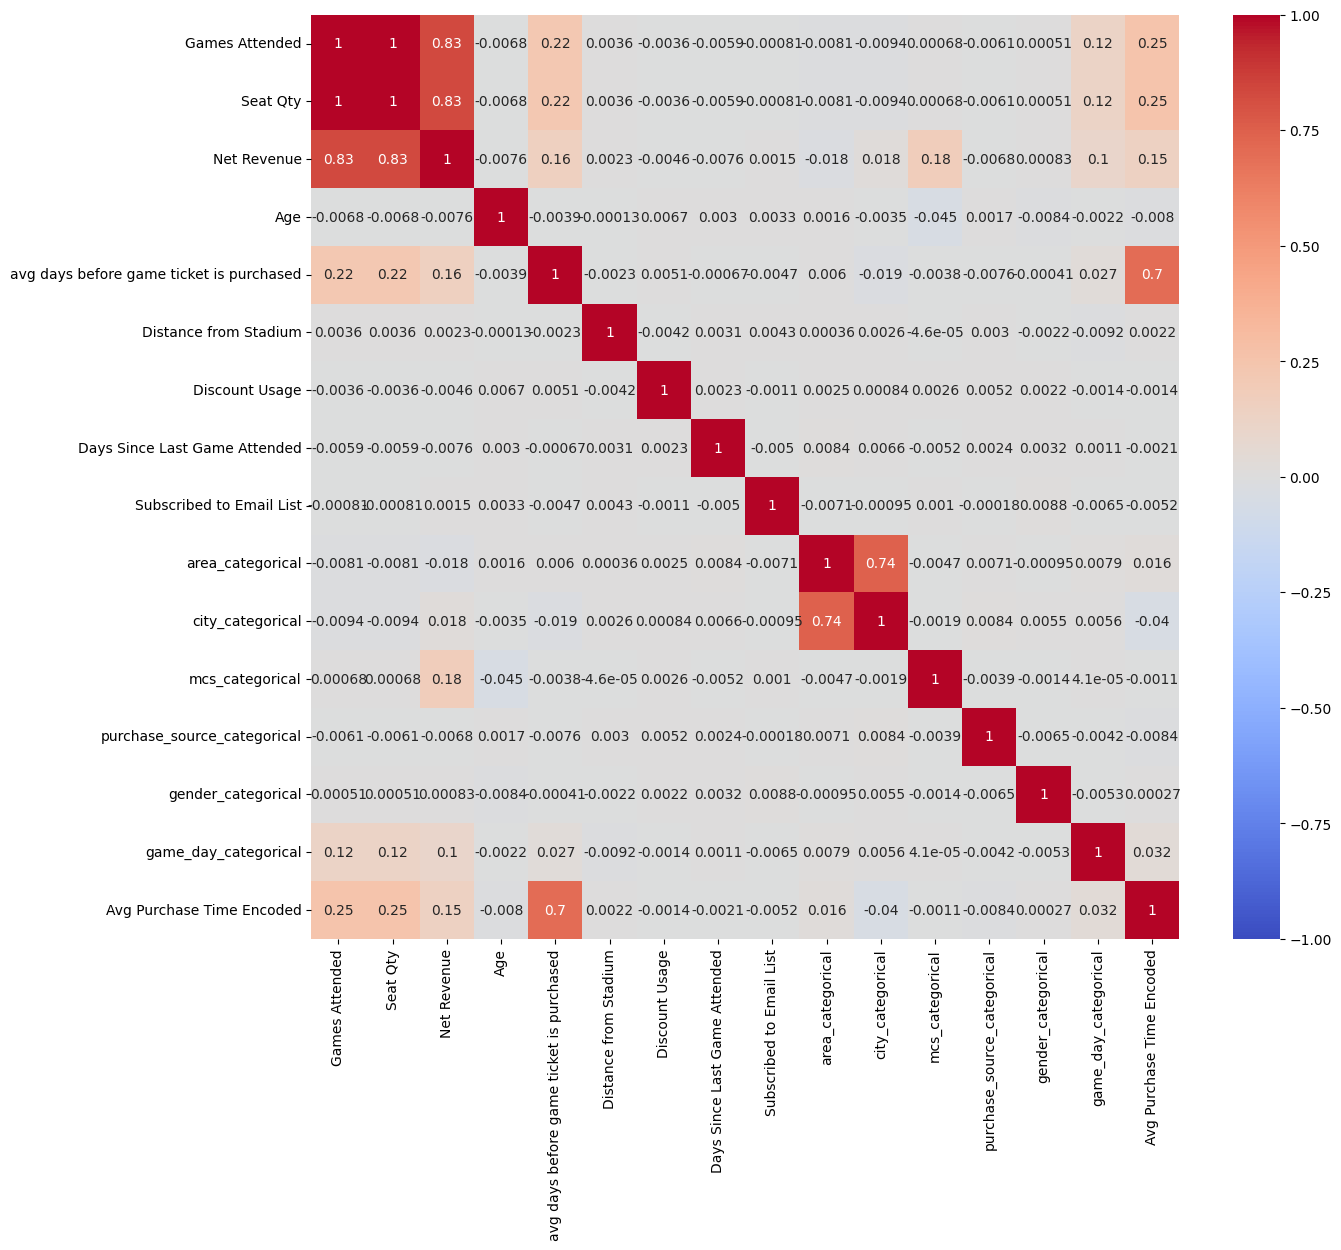

In [20]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

## EDA

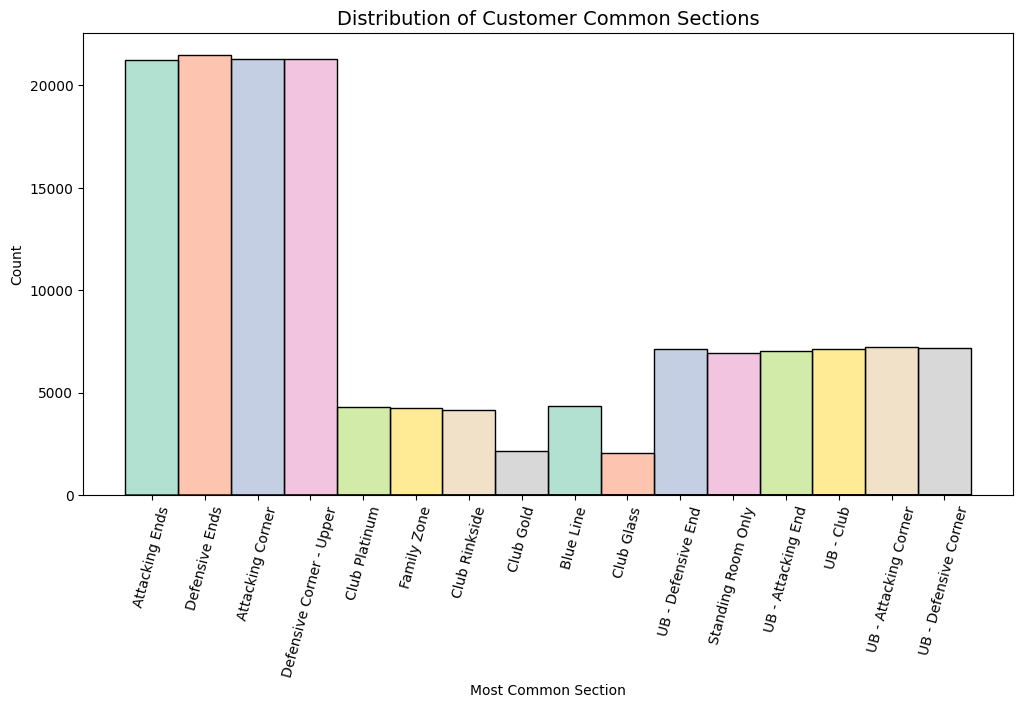

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(x=accounts['Most Common Section'], hue=accounts['Most Common Section'], palette='Set2', legend=False)
plt.xticks(rotation=75)
plt.title('Distribution of Customer Common Sections', fontsize=14)
plt.show()

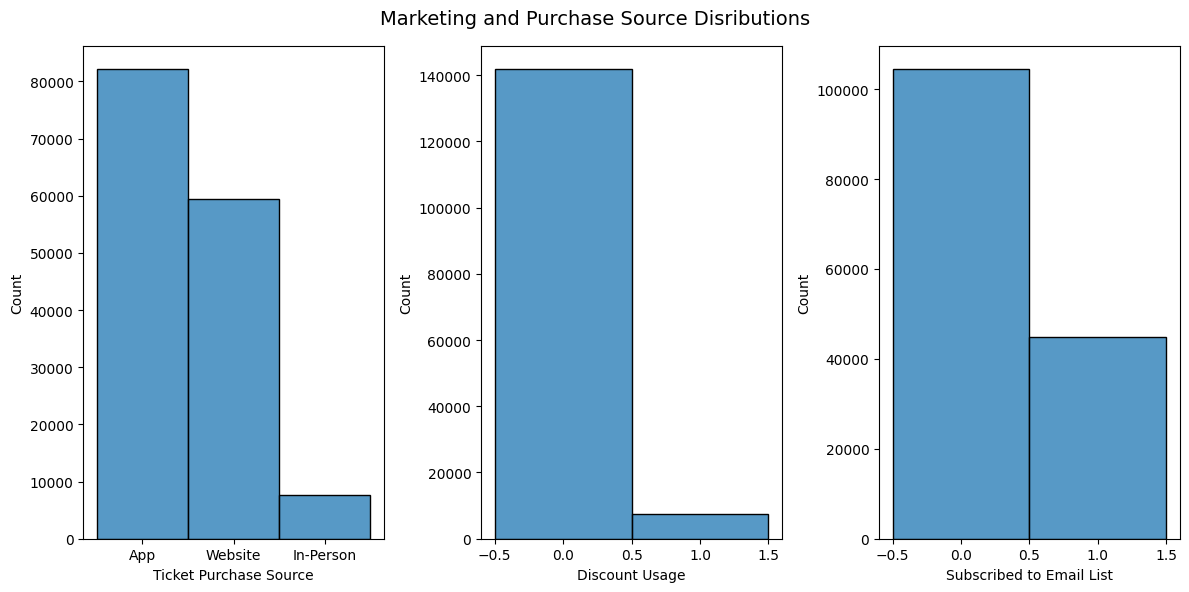

In [22]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.histplot(x=accounts['Ticket Purchase Source'], ax=axes[0])
sns.histplot(x=accounts['Discount Usage'], ax=axes[1], discrete=True)
sns.histplot(x=accounts['Subscribed to Email List'], ax=axes[2], discrete=True)

plt.suptitle('Marketing and Purchase Source Disributions', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

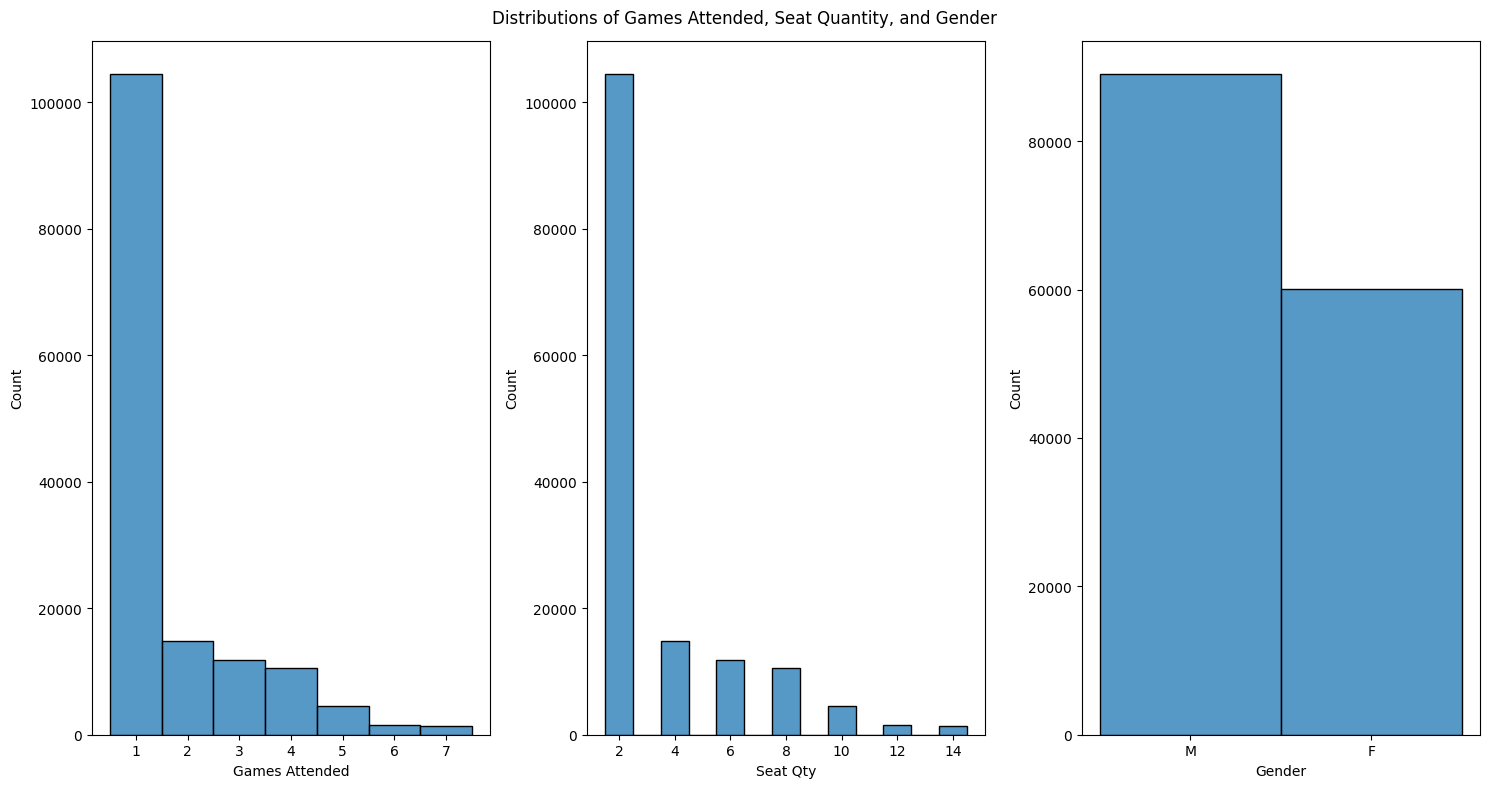

In [23]:
fig, axes = plt.subplots(1,3, figsize=(15,8))

sns.histplot(x=accounts['Games Attended'], discrete=True, ax=axes[0])
sns.histplot(x=accounts['Seat Qty'], discrete=True, ax=axes[1])
sns.histplot(x=accounts['Gender'], ax=axes[2])

plt.suptitle('Distributions of Games Attended, Seat Quantity, and Gender')
plt.tight_layout()
plt.show()

<Axes: ylabel='Games Attended'>

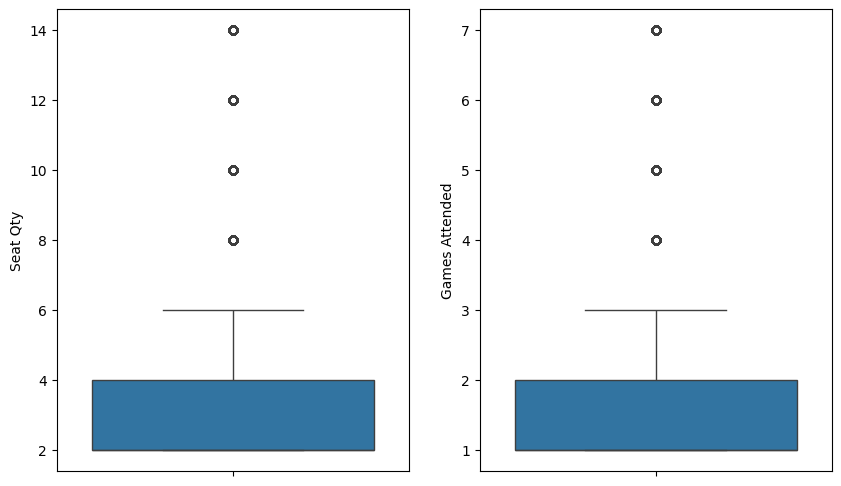

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(y=accounts['Seat Qty'], ax=axes[0])
sns.boxplot(y=accounts['Games Attended'], ax=axes[1])

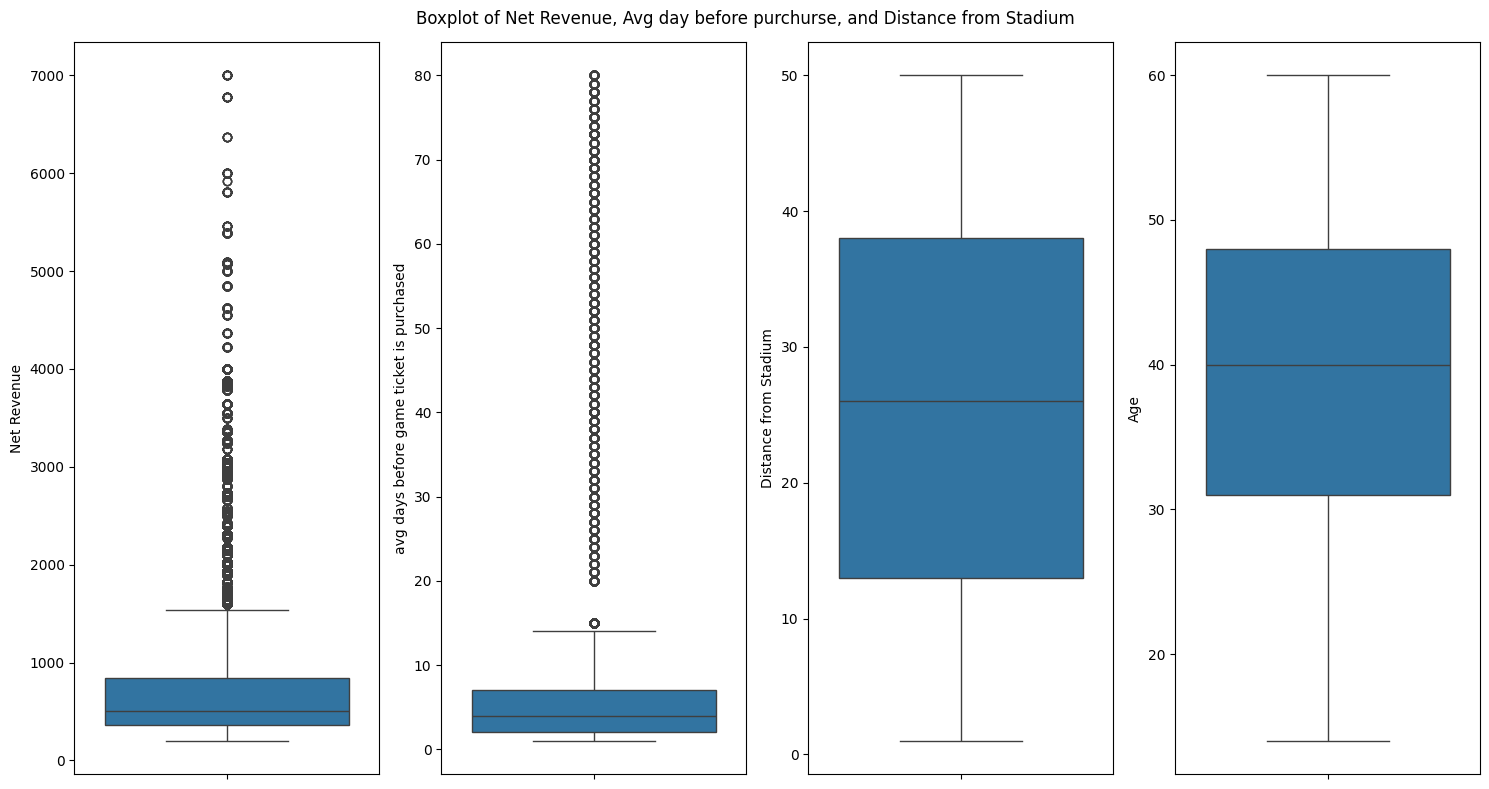

In [25]:
# Can look to winsorize the net revenue column as it has a high volume of outliers

fig, axes = plt.subplots(1, 4, figsize=(15, 8))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['avg days before game ticket is purchased'], ax=axes[1])
sns.boxplot(y=accounts['Distance from Stadium'], ax=axes[2])
sns.boxplot(y=accounts['Age'], ax=axes[3])

plt.suptitle('Boxplot of Net Revenue, Avg day before purchurse, and Distance from Stadium', fontsize=12, ha='center')

plt.tight_layout()
plt.show()

In [26]:
total_netrevenue = accounts.groupby('Area')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

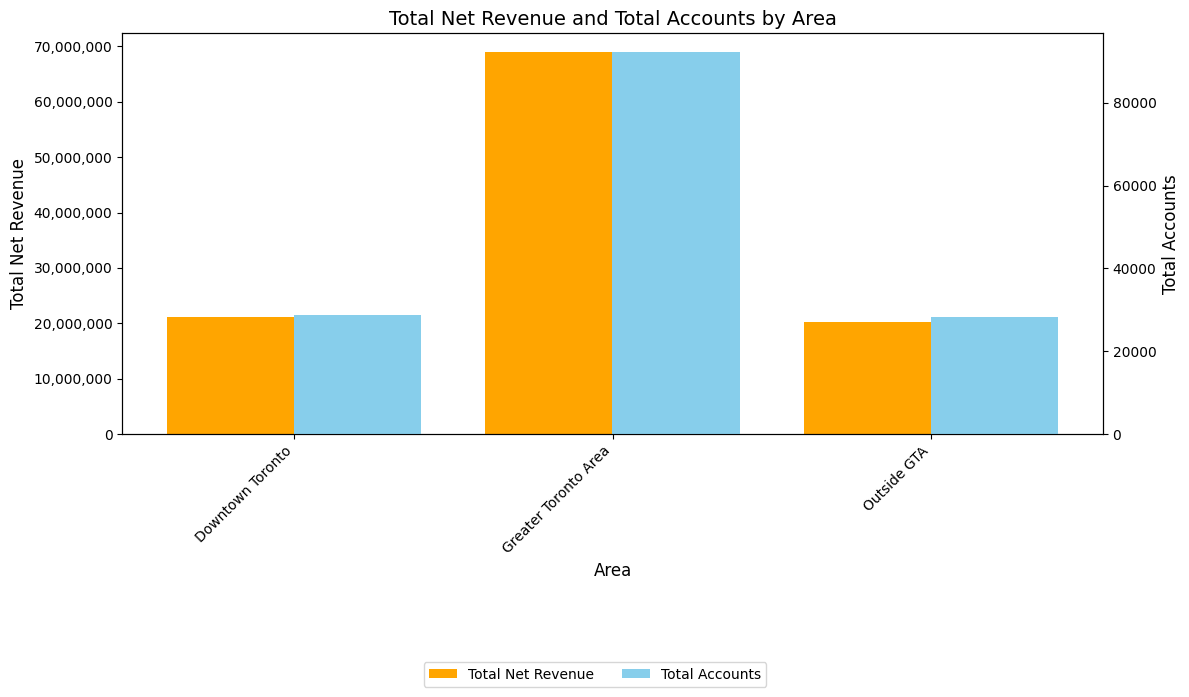

In [27]:
from matplotlib.ticker import FuncFormatter

# Group by Area to calculate totals
area_grouped = accounts.groupby("Area").agg(
    total_net_revenue=("Net Revenue", "sum"),
    total_accounts=("Games Attended", "count")
).reset_index()

# Define variables for plotting
areas = area_grouped["Area"]
total_net_revenue = area_grouped["total_net_revenue"]
total_accounts = area_grouped["total_accounts"]

# Define x positions for the bars
x = np.arange(len(areas))
width = 0.4  # Bar width

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total net revenue on the primary y-axis
bars1 = ax1.bar(x - width/2, total_net_revenue, width, label="Total Net Revenue", color="orange")
ax1.set_ylabel("Total Net Revenue", fontsize=12)
ax1.set_xlabel("Area", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(areas, rotation=45, ha="right")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Create a secondary y-axis for total accounts
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, total_accounts, width, label="Total Accounts", color="skyblue")
ax2.set_ylabel("Total Accounts", fontsize=12)

# Add a title and legend
ax1.set_title("Total Net Revenue and Total Accounts by Area", fontsize=14)
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust layout
plt.tight_layout()
plt.show()

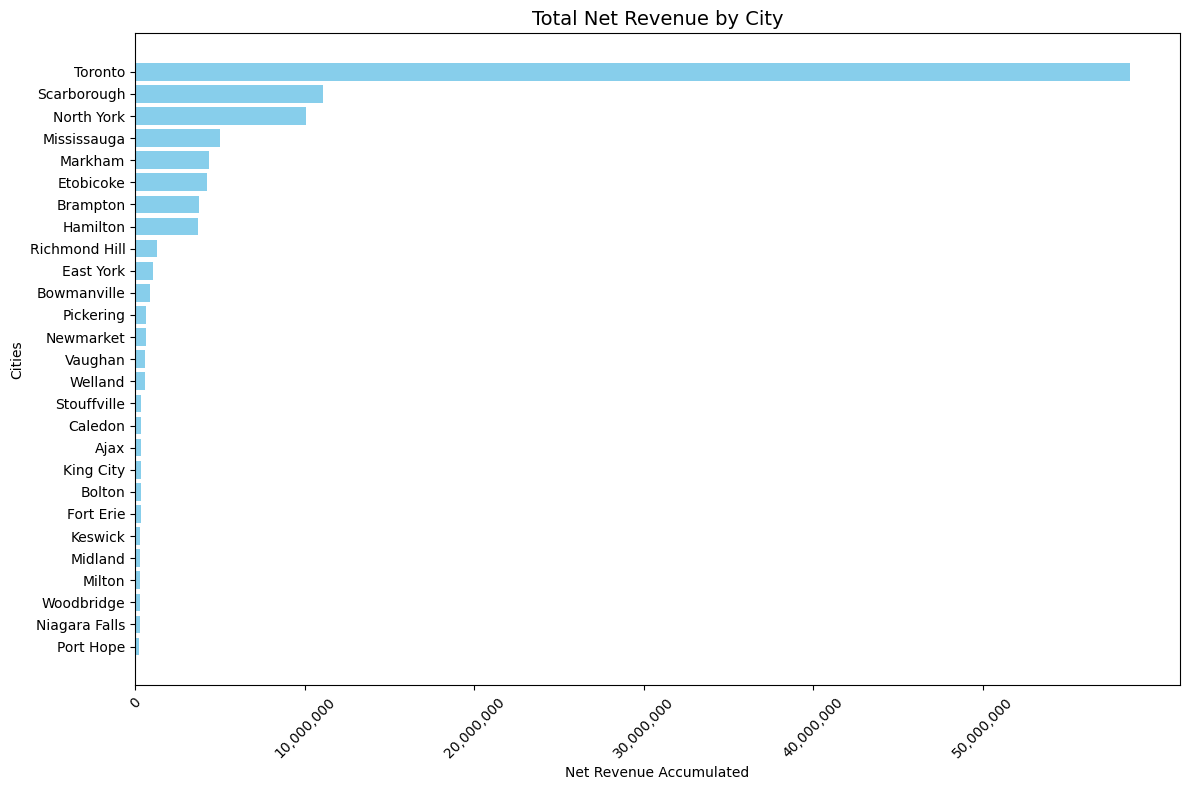

In [28]:
#Looking at total revenue by city

total_netrevenue = accounts.groupby('City')['Net Revenue'].sum()
total_netrevenue =  total_netrevenue.sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.barh(total_netrevenue.index, total_netrevenue.values, color='skyblue')
plt.xlabel('Net Revenue Accumulated')
plt.ylabel('Cities')
plt.title('Total Net Revenue by City', fontsize=14)

x_ticks = np.arange(0, total_netrevenue.values.max() + 1, step=10000000)  # Adjust the step size as needed
plt.xticks(x_ticks, labels=[f"{int(x):,}" for x in x_ticks], fontsize=10, rotation=45)


plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Winsorization of the Variables

In [29]:
accounts['Net Revenue'] = np.clip(accounts['Net Revenue'], None, 4000)
accounts['Seat Qty'] = np.clip(accounts['Seat Qty'], None, 10)
accounts['Games Attended'] = np.clip(accounts['Games Attended'], None, 5)

<Axes: ylabel='Games Attended'>

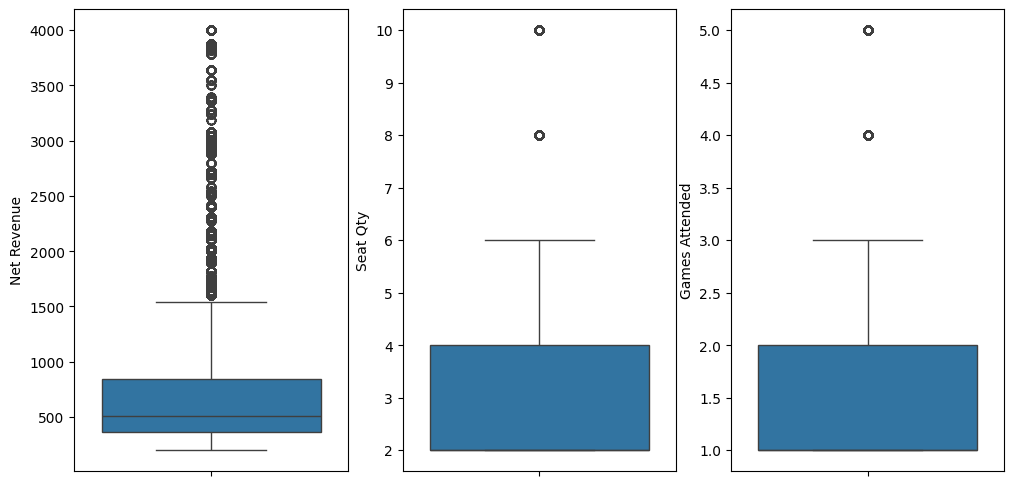

In [30]:
#Visualizations after winsorization

fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.boxplot(y=accounts['Net Revenue'], ax=axes[0])
sns.boxplot(y=accounts['Seat Qty'], ax=axes[1])
sns.boxplot(y=accounts['Games Attended'], ax=axes[2])

### Feature Engineering

In [31]:
# Calculate Average Revenue Per Seat
accounts['Avg Revenue Per Seat'] = accounts['Net Revenue'] / accounts['Seat Qty']

# Calculate Average Revenue Per Game
accounts['Avg Revenue Per Game'] = accounts['Net Revenue'] / accounts['Games Attended']


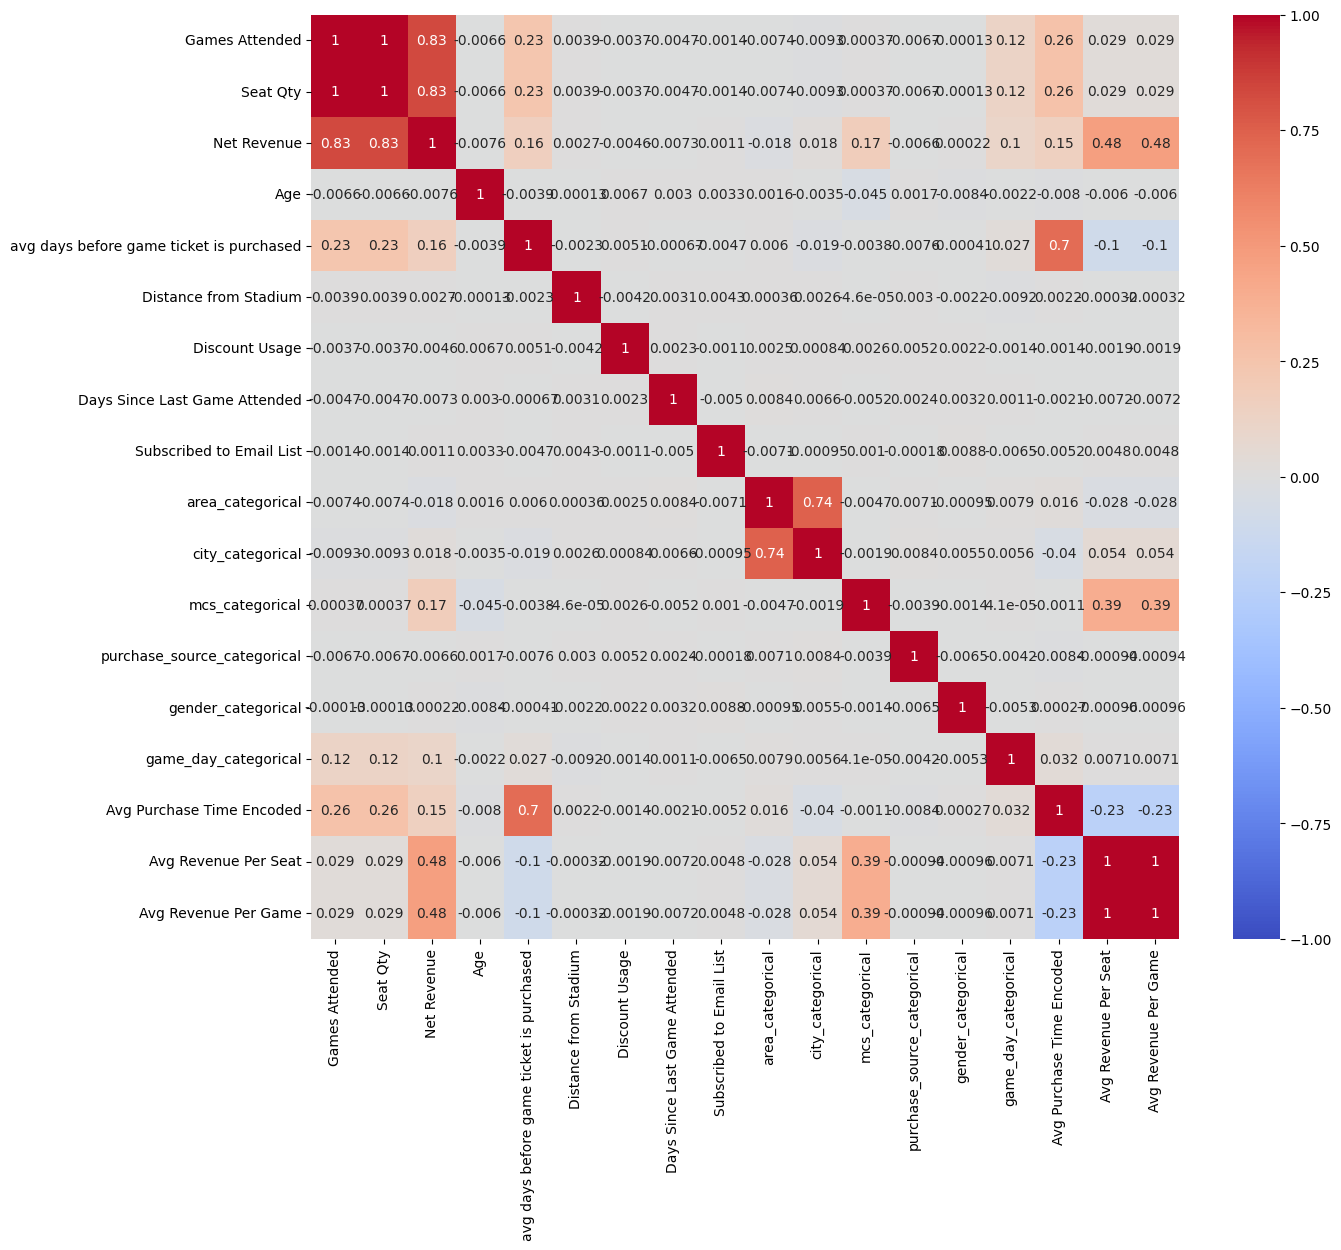

In [32]:
corr_matrix = accounts.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [33]:
accounts_final = accounts.drop(['Most Common Section','Region', 'City', 'Area', 
                                'Ticket Purchase Source', 'Most Common Game Day', 
                                'Gender', 'city_categorical','avg days before game ticket is purchased',
                                'Avg Purchase Time', 'purchase_source_categorical', 'game_day_categorical',
                                'gender_categorical','Seat Qty'], axis=1)

In [34]:
accounts_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149176 entries, 0 to 149175
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Games Attended                 149176 non-null  int64  
 1   Net Revenue                    149176 non-null  float64
 2   Age                            149176 non-null  int64  
 3   Distance from Stadium          149176 non-null  int64  
 4   Discount Usage                 149176 non-null  int64  
 5   Days Since Last Game Attended  149176 non-null  int64  
 6   Subscribed to Email List       149176 non-null  int64  
 7   area_categorical               149176 non-null  int64  
 8   mcs_categorical                149176 non-null  int64  
 9   Avg Purchase Time Encoded      149176 non-null  int64  
 10  Avg Revenue Per Seat           149176 non-null  float64
 11  Avg Revenue Per Game           149176 non-null  float64
dtypes: float64(3), int64(9)
memory

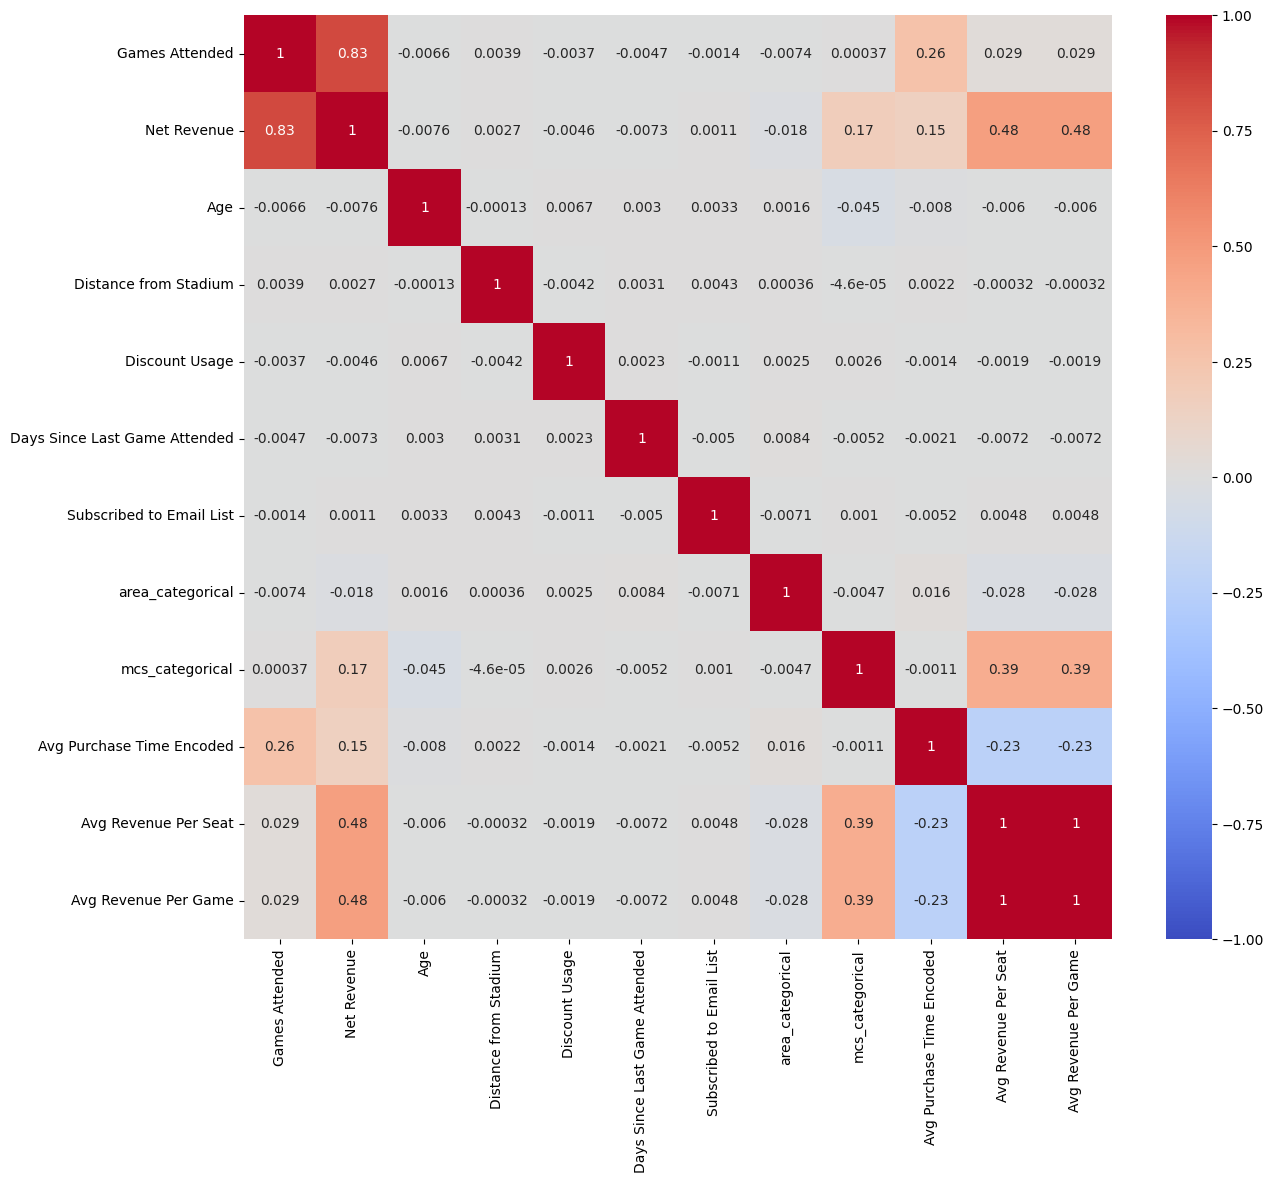

In [35]:
corr_matrix = accounts_final.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [36]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(accounts_final)

minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(accounts_final)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(accounts_final)

# HDSBCAN

### Optimization

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import hdbscan

def evaluate_hdbscan(scaled_hdbscan_data, hdbscan_min_cluster_size, hdbscan_min_samples):
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=hdbscan_min_cluster_size, min_samples=hdbscan_min_samples)
    hdbscan_labels = hdbscan_clusterer.fit_predict(scaled_hdbscan_data)
    
    # Count clusters and noise ratio
    hdbscan_n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    hdbscan_noise_ratio = np.sum(hdbscan_labels == -1) / len(hdbscan_labels)
    
    # Skip configurations with < 3 clusters or too much noise
    if hdbscan_n_clusters < 2 or hdbscan_noise_ratio > 0.5:
        return -1, hdbscan_n_clusters
    
    # Calculate silhouette score
    hdbscan_filtered_data = scaled_hdbscan_data[hdbscan_labels != -1]
    hdbscan_filtered_labels = hdbscan_labels[hdbscan_labels != -1]
    try:
        hdbscan_score = silhouette_score(hdbscan_filtered_data, hdbscan_filtered_labels)
    except ValueError:
        hdbscan_score = -1  # Handle cases with one cluster
    
    return hdbscan_score, hdbscan_n_clusters

def optimize_hdbscan_all(minmax_df, standard_df, robust_df, hdbscan_sample_size=10000):
    hdbscan_min_cluster_sizes = range(5, 10) 
    hdbscan_min_samples_values = range(2, 5)  
    
    hdbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    hdbscan_best_title, hdbscan_best_data, hdbscan_best_cluster_size, hdbscan_best_min_samples = None, None, None, None
    hdbscan_best_score = -1

    for hdbscan_title, hdbscan_data in hdbscan_datasets.items():
        # Reduce sample size
        if hdbscan_data.shape[0] > hdbscan_sample_size:
            hdbscan_indices = np.random.choice(hdbscan_data.shape[0], hdbscan_sample_size, replace=False)
            hdbscan_sampled_data = hdbscan_data[hdbscan_indices, :]
        else:
            hdbscan_sampled_data = hdbscan_data

        # Evaluate HDBSCAN configurations
        for hdbscan_min_cluster_size in hdbscan_min_cluster_sizes:
            for hdbscan_min_samples in hdbscan_min_samples_values:
                hdbscan_score, hdbscan_n_clusters = evaluate_hdbscan(
                    hdbscan_sampled_data, hdbscan_min_cluster_size, hdbscan_min_samples
                )
                
                # Update the best configuration
                if hdbscan_score > hdbscan_best_score:
                    hdbscan_best_title = hdbscan_title
                    hdbscan_best_data = hdbscan_sampled_data
                    hdbscan_best_cluster_size = hdbscan_min_cluster_size
                    hdbscan_best_min_samples = hdbscan_min_samples
                    hdbscan_best_score = hdbscan_score
                
                # Early stopping if a high score is found
                if hdbscan_score > 0.8:
                    break
            if hdbscan_best_score > 0.8:
                break
        
        print(f"{hdbscan_title} - Best min_cluster_size: {hdbscan_best_cluster_size}, Best min_samples: {hdbscan_best_min_samples}, "
              f"Silhouette Score: {hdbscan_best_score}")
    
    return hdbscan_best_data, hdbscan_best_cluster_size, hdbscan_best_min_samples, hdbscan_best_score, hdbscan_best_title

# Run the optimization
hdbscan_best_data, hdbscan_best_cluster_size, hdbscan_best_min_samples, hdbscan_best_score, hdbscan_best_title = optimize_hdbscan_all(
    minmax_df, standard_df, robust_df, hdbscan_sample_size=10000
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {hdbscan_best_title}, Min Cluster Size: {hdbscan_best_cluster_size}, Min Samples: {hdbscan_best_min_samples}, Silhouette Score: {hdbscan_best_score}")

### Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hdbscan

def visualize_best_hdbscan_clusters_with_pca(hdbscan_best_data, hdbscan_best_cluster_size, hdbscan_best_min_samples, hdbscan_best_title):
    # Perform HDBSCAN with the best parameters
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=hdbscan_best_cluster_size, min_samples=hdbscan_best_min_samples)
    hdbscan_labels = hdbscan_clusterer.fit_predict(hdbscan_best_data)
    
    # Calculate additional metrics
    hdbscan_n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    hdbscan_n_noise = list(hdbscan_labels).count(-1)
    if hdbscan_n_clusters > 1:
        hdbscan_silhouette_avg = silhouette_score(hdbscan_best_data, hdbscan_labels)
    else:
        hdbscan_silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    hdbscan_pca = PCA(n_components=0.85)
    hdbscan_pca_data = hdbscan_pca.fit_transform(hdbscan_best_data)

    # 2D Plot
    plt.figure(figsize=(10, 7))
    hdbscan_unique_labels = set(hdbscan_labels)
    hdbscan_colors = plt.cm.get_cmap("plasma", len(hdbscan_unique_labels))
    
    for label in hdbscan_unique_labels:
        if label == -1:
            color = "black"
            label_text = "Noise"
        else:
            color = hdbscan_colors(label % len(hdbscan_unique_labels))
            label_text = f"Cluster {label + 1}"
        
        plt.scatter(
            hdbscan_pca_data[hdbscan_labels == label, 0],
            hdbscan_pca_data[hdbscan_labels == label, 1],
            s=50, c=[color], label=label_text, alpha=0.7
        )
    
    plt.title(f"HDBSCAN Clustering on {hdbscan_best_title} (min_cluster_size={hdbscan_best_cluster_size}, min_samples={hdbscan_best_min_samples}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics and labels
    return hdbscan_silhouette_avg, hdbscan_n_clusters, hdbscan_n_noise, hdbscan_labels

def characterize_clusters(hdbscan_data, hdbscan_labels):
    # Convert to DataFrame if necessary
    if isinstance(hdbscan_data, np.ndarray):
        hdbscan_data = pd.DataFrame(hdbscan_data, columns=[f"Feature_{i+1}" for i in range(hdbscan_data.shape[1])])
    
    # Add the labels as a new column
    hdbscan_data['Cluster'] = hdbscan_labels
    
    # Group by cluster and calculate mean for each feature
    hdbscan_cluster_characteristics = hdbscan_data.groupby('Cluster').mean()
    
    # Count the number of points in each cluster
    hdbscan_cluster_sizes = hdbscan_data['Cluster'].value_counts().sort_index()
    
    # Add the size of each cluster as a new column
    hdbscan_cluster_characteristics['Cluster Size'] = hdbscan_cluster_sizes

    # Reset index for better readability
    hdbscan_cluster_characteristics.reset_index(inplace=True)
    return hdbscan_cluster_characteristics

# Call the visualization function using the best parameters from the optimization
hdbscan_silhouette_avg, hdbscan_num_clusters, hdbscan_num_noise_points, hdbscan_labels = visualize_best_hdbscan_clusters_with_pca(
    hdbscan_best_data, hdbscan_best_cluster_size, hdbscan_best_min_samples, hdbscan_best_title
)

# Display metrics
print(f"Silhouette Score: {hdbscan_silhouette_avg}")
print(f"Number of Clusters: {hdbscan_num_clusters}")
print(f"Number of Noise Points: {hdbscan_num_noise_points}")

# Characterize clusters
hdbscan_cluster_characteristics = characterize_clusters(hdbscan_best_data, hdbscan_labels)
print(hdbscan_cluster_characteristics)

# DBSCAN

### Optimization

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def optimize_dbscan_all(minmax_df, standard_df, robust_df, dbscan_sample_size=10000):
    # Define ranges for eps and min_samples
    dbscan_eps_values = np.arange(0.5, 3.0, 0.5)
    dbscan_min_samples_values = range(3, 10)
    
    # Dictionary to hold the datasets and titles
    dbscan_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    dbscan_best_title = None
    dbscan_best_eps = None
    dbscan_best_min_samples = None
    dbscan_best_score = -1
    dbscan_best_data = None
    
    # Iterate over each dataset
    for dbscan_title, dbscan_scaled_data in dbscan_datasets.items():
        # Sample the data if it's larger than the specified sample size
        if dbscan_scaled_data.shape[0] > dbscan_sample_size:
            dbscan_indices = np.random.choice(dbscan_scaled_data.shape[0], dbscan_sample_size, replace=False)
            dbscan_sampled_data = dbscan_scaled_data[dbscan_indices, :]
        else:
            dbscan_sampled_data = dbscan_scaled_data

        # Local variables to find the best for each dataset
        dbscan_best_eps_for_dataset = None
        dbscan_best_min_samples_for_dataset = None
        dbscan_best_score_for_dataset = -1

        # Iterate over combinations of eps and min_samples
        for dbscan_eps in dbscan_eps_values:
            dbscan_early_stop = False  # Early stopping flag for this dataset
            for dbscan_min_samples in dbscan_min_samples_values:
                # Apply DBSCAN
                dbscan_model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
                dbscan_labels = dbscan_model.fit_predict(dbscan_sampled_data)
                
                # Count the number of clusters (excluding noise)
                dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
                dbscan_noise_ratio = np.sum(dbscan_labels == -1) / len(dbscan_labels)
                
                # Skip configurations with fewer than three clusters or excessive noise
                if dbscan_n_clusters < 3 or dbscan_noise_ratio > 0.5:
                    continue
                
                # Filter out noise points for silhouette score calculation
                dbscan_filtered_data = dbscan_sampled_data[dbscan_labels != -1]
                dbscan_filtered_labels = dbscan_labels[dbscan_labels != -1]

                try:
                    dbscan_score = silhouette_score(dbscan_filtered_data, dbscan_filtered_labels)
                except ValueError:
                    # Skip configurations where silhouette score calculation fails
                    continue

                # Update the best score for the current dataset
                if dbscan_score > dbscan_best_score_for_dataset:
                    dbscan_best_eps_for_dataset = dbscan_eps
                    dbscan_best_min_samples_for_dataset = dbscan_min_samples
                    dbscan_best_score_for_dataset = dbscan_score

                # Stop early if a high silhouette score is found
                if dbscan_score > 0.8:
                    dbscan_early_stop = True
                    break

            if dbscan_early_stop:
                break

        # Print the best configuration for this dataset
        print(f"{dbscan_title} - Best eps: {dbscan_best_eps_for_dataset}, Best min_samples: {dbscan_best_min_samples_for_dataset}, "
              f"Silhouette Score: {dbscan_best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if dbscan_best_score_for_dataset > dbscan_best_score:
            dbscan_best_title = dbscan_title
            dbscan_best_eps = dbscan_best_eps_for_dataset
            dbscan_best_min_samples = dbscan_best_min_samples_for_dataset
            dbscan_best_score = dbscan_best_score_for_dataset
            dbscan_best_data = dbscan_sampled_data

    # Return the best configuration across all datasets
    return dbscan_best_data, dbscan_best_eps, dbscan_best_min_samples, dbscan_best_score, dbscan_best_title

# Use the function to process all three datasets at once
dbscan_best_data, dbscan_best_eps, dbscan_best_min_samples, dbscan_best_score, dbscan_best_title = optimize_dbscan_all(
    minmax_df, standard_df, robust_df, dbscan_sample_size=10000
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {dbscan_best_title}, Eps: {dbscan_best_eps}, Min Samples: {dbscan_best_min_samples}, Silhouette Score: {dbscan_best_score}")

### Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import plotly.graph_objs as go
import numpy as np

def visualize_best_dbscan_clusters_optimized_pca(dbscan_best_data, dbscan_best_eps, dbscan_best_min_samples, dbscan_best_title):
    # Perform DBSCAN with the best parameters
    dbscan_model = DBSCAN(eps=dbscan_best_eps, min_samples=dbscan_best_min_samples)
    dbscan_labels = dbscan_model.fit_predict(dbscan_best_data)
    
    # Filter out noise points for silhouette score calculation
    dbscan_filtered_data = dbscan_best_data[dbscan_labels != -1]
    dbscan_filtered_labels = dbscan_labels[dbscan_labels != -1]

    # Calculate additional metrics
    dbscan_n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_n_noise = np.sum(dbscan_labels == -1)
    dbscan_cluster_sizes = {label: np.sum(dbscan_labels == label) for label in set(dbscan_labels) if label != -1}
    if dbscan_n_clusters > 1:
        dbscan_silhouette_avg = silhouette_score(dbscan_filtered_data, dbscan_filtered_labels)
    else:
        dbscan_silhouette_avg = "Not applicable"

    # Apply PCA to retain 85% of variance
    dbscan_pca = PCA(n_components=0.85)
    dbscan_pca_data = dbscan_pca.fit_transform(dbscan_best_data)
    
    # Split PCA into 2D and 3D data for visualization
    dbscan_pca_2d_data = dbscan_pca_data[:, :2]
    dbscan_pca_3d_data = dbscan_pca_data[:, :3] if dbscan_pca_data.shape[1] >= 3 else None

    # Plot 2D visualization
    plt.figure(figsize=(10, 7))
    dbscan_unique_labels = set(dbscan_labels)
    
    # Define distinct colors for clusters
    dbscan_distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0', '#A1FF33']
    for label in dbscan_unique_labels:
        if label == -1:
            # Black color for noise points
            color = "black"
            label_text = "Noise"
        else:
            color = dbscan_distinct_colors[label % len(dbscan_distinct_colors)]
            label_text = f"Cluster {label} (Size: {dbscan_cluster_sizes[label]})"
        
        plt.scatter(
            dbscan_pca_2d_data[dbscan_labels == label, 0], 
            dbscan_pca_2d_data[dbscan_labels == label, 1], 
            s=50, c=color, label=label_text, alpha=0.7
        )
    
    # Title with dataset name and best parameters
    plt.title(f"DBSCAN Clustering on {dbscan_best_title} (eps={dbscan_best_eps}, min_samples={dbscan_best_min_samples}) - PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3D Plot with Plotly (if available)
    if dbscan_pca_3d_data is not None:
        fig = go.Figure()

        for label in dbscan_unique_labels:
            if label == -1:
                color = "black"
                label_text = "Noise"
            else:
                color = dbscan_distinct_colors[label % len(dbscan_distinct_colors)]
                label_text = f"Cluster {label} (Size: {dbscan_cluster_sizes[label]})"
            
            fig.add_trace(go.Scatter3d(
                x=dbscan_pca_3d_data[dbscan_labels == label, 0],
                y=dbscan_pca_3d_data[dbscan_labels == label, 1],
                z=dbscan_pca_3d_data[dbscan_labels == label, 2],
                mode='markers',
                marker=dict(size=8, color=color, opacity=0.8),
                name=label_text
            ))

        fig.update_layout(
            scene=dict(
                xaxis_title="PCA Component 1",
                yaxis_title="PCA Component 2",
                zaxis_title="PCA Component 3"
            ),
            title=f"3D PCA Visualization - {dbscan_best_title}",
            height=800
        )
        fig.show()

    # Return the metrics
    return dbscan_silhouette_avg, dbscan_n_clusters, dbscan_n_noise, dbscan_cluster_sizes

# Call the function using the best configuration from optimization
dbscan_silhouette_avg, dbscan_num_clusters, dbscan_num_noise_points, dbscan_cluster_sizes = visualize_best_dbscan_clusters_optimized_pca(
    dbscan_best_data, dbscan_best_eps, dbscan_best_min_samples, dbscan_best_title
)

# Display metrics
print(f"Silhouette Score: {dbscan_silhouette_avg}")
print(f"Number of Clusters: {dbscan_num_clusters}")
print(f"Number of Noise Points: {dbscan_num_noise_points}")
print(f"Cluster Sizes: {dbscan_cluster_sizes}")

# BIRCH Model

Optimization

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_birch_all(minmax_df, standard_df, robust_df, birch_branching_factors=[25, 50], birch_thresholds=[0.5, 1.0], birch_sample_size=10000, birch_early_stop=0.8):
    birch_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    birch_best_title = None
    birch_best_branching_factor = None
    birch_best_threshold = None
    birch_best_score = -1
    birch_best_data = None  # Store the data corresponding to the best configuration
    
    # Iterate over each dataset
    for birch_title, birch_data in birch_datasets.items():
        # Sample data if it's too large
        if birch_data.shape[0] > birch_sample_size:
            birch_random_indices = np.random.choice(birch_data.shape[0], birch_sample_size, replace=False)
            birch_sampled_data = birch_data[birch_random_indices, :]
        else:
            birch_sampled_data = birch_data

        # Local variables to find the best for each dataset
        birch_best_branching_for_dataset = None
        birch_best_threshold_for_dataset = None
        birch_best_score_for_dataset = -1

        # Iterate over combinations of branching factor and threshold
        for birch_branching_factor in birch_branching_factors:
            for birch_threshold in birch_thresholds:
                try:
                    # Fit the BIRCH model
                    birch_model = Birch(branching_factor=birch_branching_factor, threshold=birch_threshold)
                    birch_labels = birch_model.fit_predict(birch_sampled_data)

                    # Check if there are enough clusters
                    birch_n_clusters = len(set(birch_labels)) - (1 if -1 in birch_labels else 0)
                    if birch_n_clusters < 3:
                        continue  # Skip configurations with fewer than 3 clusters

                    # Calculate the silhouette score
                    birch_score = silhouette_score(birch_sampled_data, birch_labels)
                    
                    # Update the best score for this dataset
                    if birch_score > birch_best_score_for_dataset:
                        birch_best_branching_for_dataset = birch_branching_factor
                        birch_best_threshold_for_dataset = birch_threshold
                        birch_best_score_for_dataset = birch_score
                    
                    # Early stopping if a high silhouette score is found
                    if birch_score >= birch_early_stop:
                        print(f"Early stopping: {birch_title} reached silhouette score {birch_score} with branching_factor={birch_branching_factor}, threshold={birch_threshold}")
                        birch_best_branching_for_dataset = birch_branching_factor
                        birch_best_threshold_for_dataset = birch_threshold
                        birch_best_score_for_dataset = birch_score
                        break  # Exit threshold loop

                except Exception as e:
                    print(f"Error for dataset {birch_title} with branching_factor={birch_branching_factor}, threshold={birch_threshold}: {e}")
                    continue

            if birch_best_score_for_dataset >= birch_early_stop:
                break  # Exit branching factor loop

        # Print the best configuration for this dataset
        print(f"{birch_title} - Best Branching Factor: {birch_best_branching_for_dataset}, Best Threshold: {birch_best_threshold_for_dataset}, "
              f"Silhouette Score: {birch_best_score_for_dataset}")

        # Update the best overall configuration
        if birch_best_score_for_dataset > birch_best_score:
            birch_best_title = birch_title
            birch_best_branching_factor = birch_best_branching_for_dataset
            birch_best_threshold = birch_best_threshold_for_dataset
            birch_best_score = birch_best_score_for_dataset
            birch_best_data = birch_sampled_data

    # Return the best configuration across all datasets
    return birch_best_data, birch_best_branching_factor, birch_best_threshold, birch_best_score, birch_best_title

# Example usage
birch_best_data, birch_best_branching_factor, birch_best_threshold, birch_best_score, birch_best_title = optimize_birch_all(
    minmax_df, standard_df, robust_df, birch_branching_factors=[25, 50], birch_thresholds=[0.5, 1.0], birch_sample_size=10000, birch_early_stop=0.8
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {birch_best_title}, Branching Factor: {birch_best_branching_factor}, Threshold: {birch_best_threshold}, Silhouette Score: {birch_best_score}")

### Model

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import Birch

def visualize_birch_clusters(birch_best_data, birch_best_branching_factor, birch_best_threshold, birch_best_title, birch_sample_size=10000):
    # Debugging: Check the input data
    print(f"Input Data Shape: {birch_best_data.shape}")
    print(f"Branching Factor: {birch_best_branching_factor}, Threshold: {birch_best_threshold}")

    # Subsample data for visualization if it's too large
    if birch_best_data.shape[0] > birch_sample_size:
        birch_random_indices = np.random.choice(birch_best_data.shape[0], birch_sample_size, replace=False)
        birch_visualization_data = birch_best_data[birch_random_indices, :]
    else:
        birch_visualization_data = birch_best_data

    # Debugging: Check the visualization data shape
    print(f"Visualization Data Shape: {birch_visualization_data.shape}")

    # Perform BIRCH clustering
    birch_model = Birch(branching_factor=birch_best_branching_factor, threshold=birch_best_threshold)
    birch_labels = birch_model.fit_predict(birch_visualization_data)

    # Debugging: Check labels
    print(f"Labels: {set(birch_labels)}")

    # Apply PCA for 2D visualization
    birch_pca = PCA(n_components=2)
    birch_pca_data = birch_pca.fit_transform(birch_visualization_data)

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    birch_unique_labels = set(birch_labels)
    
    # Generate distinct colors for clusters
    birch_distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0', '#A1FF33', '#5733FF', '#FF5733']
    for birch_label in birch_unique_labels:
        if birch_label == -1:  # Noise points
            birch_color = "black"
            birch_label_text = "Noise"
        else:
            birch_color = birch_distinct_colors[birch_label % len(birch_distinct_colors)]
            birch_label_text = f"Cluster {birch_label + 1}"
        
        plt.scatter(
            birch_pca_data[birch_labels == birch_label, 0], 
            birch_pca_data[birch_labels == birch_label, 1], 
            s=50, c=birch_color, label=birch_label_text, alpha=0.7
        )
    
    # Title and labels
    plt.title(f"BIRCH Clustering on {birch_best_title} (Branching Factor={birch_best_branching_factor}, Threshold={birch_best_threshold}) - PCA (2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()

# Usage example (replace with your actual parameters):
try:
    visualize_birch_clusters(
        birch_best_data, 
        birch_best_branching_factor, 
        birch_best_threshold, 
        birch_best_title, 
        birch_sample_size=10000
    )
except Exception as e:
    print(f"Error during visualization: {e}")

# Expectation Maximization (GMM)

### Optimization

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_gmm_all(minmax_df, standard_df, robust_df, gmm_sample_size=10000):
    # Reduced ranges for initial testing
    gmm_n_components_values = range(2, 5)
    gmm_covariance_types = ['spherical', 'diag', 'full', 'tied']

    # Dictionary to hold the datasets and titles
    gmm_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    gmm_best_title = None
    gmm_best_n_components = None
    gmm_best_covariance_type = None
    gmm_best_score = -1
    gmm_best_data = None
    
    # Iterate over each dataset
    for gmm_title, gmm_data in gmm_datasets.items():
        # Sample the data if larger than gmm_sample_size
        if gmm_data.shape[0] > gmm_sample_size:
            gmm_random_indices = np.random.choice(gmm_data.shape[0], gmm_sample_size, replace=False)
            gmm_scaled_data = gmm_data[gmm_random_indices, :]
        else:
            gmm_scaled_data = gmm_data
        
        # Local variables to find the best for each dataset
        gmm_best_n_components_for_dataset = None
        gmm_best_covariance_type_for_dataset = None
        gmm_best_score_for_dataset = -1

        # Iterate over combinations of n_components and covariance_type
        for gmm_n_components in gmm_n_components_values:
            for gmm_covariance_type in gmm_covariance_types:
                try:
                    # Create and fit the GMM model
                    gmm_model = GaussianMixture(n_components=gmm_n_components, covariance_type=gmm_covariance_type, random_state=42)
                    gmm_labels = gmm_model.fit_predict(gmm_scaled_data)

                    # Count the number of unique clusters
                    gmm_n_clusters = len(set(gmm_labels))

                    # Skip configurations with fewer than three clusters
                    if gmm_n_clusters < 3:
                        continue

                    # Calculate silhouette score for valid configurations
                    gmm_score = silhouette_score(gmm_scaled_data, gmm_labels)

                    # Update the best score for the current dataset
                    if gmm_score > gmm_best_score_for_dataset:
                        gmm_best_n_components_for_dataset = gmm_n_components
                        gmm_best_covariance_type_for_dataset = gmm_covariance_type
                        gmm_best_score_for_dataset = gmm_score

                except Exception as e:
                    print(f"Error with {gmm_title}, n_components={gmm_n_components}, covariance_type={gmm_covariance_type}: {e}")
                    continue

        # Print the best configuration for this dataset
        print(f"{gmm_title} - Best n_components: {gmm_best_n_components_for_dataset}, "
              f"Covariance Type: {gmm_best_covariance_type_for_dataset}, Silhouette Score: {gmm_best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if gmm_best_score_for_dataset > gmm_best_score and gmm_best_covariance_type_for_dataset:
            gmm_best_title = gmm_title
            gmm_best_n_components = gmm_best_n_components_for_dataset
            gmm_best_covariance_type = gmm_best_covariance_type_for_dataset
            gmm_best_score = gmm_best_score_for_dataset
            gmm_best_data = gmm_scaled_data

    # Ensure valid covariance_type is returned
    if gmm_best_covariance_type is None:
        print("Warning: No valid covariance_type found. Defaulting to 'full'.")
        gmm_best_covariance_type = 'full'

    # Return the best configuration across all datasets
    return gmm_best_data, gmm_best_n_components, gmm_best_covariance_type, gmm_best_score, gmm_best_title

# Use the function to process all three datasets at once
gmm_best_data, gmm_best_n_components, gmm_best_covariance_type, gmm_best_score, gmm_best_title = optimize_gmm_all(
    minmax_df, standard_df, robust_df
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {gmm_best_title}, N Components: {gmm_best_n_components}, Covariance Type: {gmm_best_covariance_type}, Silhouette Score: {gmm_best_score}")

### Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def visualize_gmm_clusters_optimized_pca(gmm_best_data, gmm_best_n_components, gmm_best_covariance_type, gmm_best_title):
    # Debugging: Validate covariance_type
    allowed_covariance_types = {'spherical', 'full', 'tied', 'diag'}
    if gmm_best_covariance_type not in allowed_covariance_types:
        raise ValueError(f"Invalid covariance_type: {gmm_best_covariance_type}. Must be one of {allowed_covariance_types}.")

    # Perform GMM with the best parameters
    gmm_model = GaussianMixture(n_components=gmm_best_n_components, covariance_type=gmm_best_covariance_type, random_state=42)
    gmm_labels = gmm_model.fit_predict(gmm_best_data)
    
    # Calculate additional metrics
    gmm_n_clusters = len(set(gmm_labels))
    gmm_n_noise = list(gmm_labels).count(-1)  # For GMM, there usually isn’t noise, but included for consistency
    if gmm_n_clusters > 1:
        gmm_silhouette_avg = silhouette_score(gmm_best_data, gmm_labels)
    else:
        gmm_silhouette_avg = "Not applicable"  # For cases with 1 or no clusters

    # Apply PCA to retain 85% of variance
    gmm_pca = PCA(n_components=0.85)
    gmm_pca_data = gmm_pca.fit_transform(gmm_best_data)
    
    # If PCA reduces to more than 2 dimensions, select only the first two components for visualization
    if gmm_pca_data.shape[1] > 2:
        gmm_pca_data = gmm_pca_data[:, :2]
    
    # Plot the clusters
    plt.figure(figsize=(10, 7))
    gmm_unique_labels = set(gmm_labels)
    
    # Use a color map without brown tones
    gmm_colors = plt.cm.get_cmap("plasma", len(gmm_unique_labels))
    for gmm_label in gmm_unique_labels:
        if gmm_label == -1:
            gmm_color = "black"
            gmm_label_text = "Noise"
        else:
            gmm_color = gmm_colors(gmm_label)
            gmm_label_text = f"Cluster {gmm_label + 1}"
        
        plt.scatter(
            gmm_pca_data[gmm_labels == gmm_label, 0], 
            gmm_pca_data[gmm_labels == gmm_label, 1], 
            s=50, c=[gmm_color], label=gmm_label_text, alpha=0.7
        )
    
    plt.title(f"GMM Clustering on {gmm_best_title} (n_components={gmm_best_n_components}, covariance_type={gmm_best_covariance_type}) - 2D PCA (85% Variance Retained)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return the metrics as separate outputs
    return gmm_silhouette_avg, gmm_n_clusters, gmm_n_noise

# Call the function using the best configuration from optimize_gmm_all
try:
    gmm_silhouette_avg, gmm_num_clusters, gmm_num_noise_points = visualize_gmm_clusters_optimized_pca(
        gmm_best_data, gmm_best_n_components, gmm_best_covariance_type, gmm_best_title
    )

    # Display the metrics separately
    print(f"Silhouette Score: {gmm_silhouette_avg}")
    print(f"Number of Clusters: {gmm_num_clusters}")
    print(f"Number of Noise Points: {gmm_num_noise_points}")
except ValueError as e:
    print(f"Error: {e}")

# Agglomerative Clustering

### Optimization

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

def optimize_agglomerative_all(minmax_df, standard_df, robust_df, agglomerative_sample_size=10000, min_cluster_size=100, early_stop_score=0.8):
    # Define ranges for number of clusters and linkage types
    agglomerative_n_clusters_values = range(3, 10)
    agglomerative_linkage_methods = ['ward', 'complete', 'average', 'single']
    
    # Dictionary to hold the datasets and titles
    agglomerative_datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }
    
    # Variables to track the best overall configuration
    agglomerative_best_title = None
    agglomerative_best_n_clusters = None
    agglomerative_best_linkage = None
    agglomerative_best_score = -1
    agglomerative_best_sampled_data = None
    
    # Iterate over each dataset
    for agglomerative_title, agglomerative_data in agglomerative_datasets.items():
        print(f"Processing {agglomerative_title}...")

        # Sample the data for clustering evaluation
        if agglomerative_data.shape[0] > agglomerative_sample_size:
            agglomerative_random_indices = np.random.choice(agglomerative_data.shape[0], agglomerative_sample_size, replace=False)
            agglomerative_sampled_data = agglomerative_data[agglomerative_random_indices, :]
        else:
            agglomerative_sampled_data = agglomerative_data

        # Local variables to find the best for each dataset
        agglomerative_best_n_clusters_for_dataset = None
        agglomerative_best_linkage_for_dataset = None
        agglomerative_best_score_for_dataset = -1

        # Iterate over combinations of n_clusters and linkage
        for agglomerative_n_clusters in agglomerative_n_clusters_values:
            for agglomerative_linkage_method in agglomerative_linkage_methods:
                try:
                    # Create and fit the Agglomerative Clustering model
                    agglomerative_model = AgglomerativeClustering(n_clusters=agglomerative_n_clusters, linkage=agglomerative_linkage_method)
                    agglomerative_labels = agglomerative_model.fit_predict(agglomerative_sampled_data)
                    
                    # Calculate cluster sizes
                    agglomerative_cluster_sizes = {label: sum(agglomerative_labels == label) for label in set(agglomerative_labels)}

                    # Skip configurations with any cluster smaller than the minimum size
                    if any(size < min_cluster_size for size in agglomerative_cluster_sizes.values()):
                        continue

                    # Calculate silhouette score
                    agglomerative_score = silhouette_score(agglomerative_sampled_data, agglomerative_labels)

                    # Update the best score for the current dataset
                    if agglomerative_score > agglomerative_best_score_for_dataset:
                        agglomerative_best_n_clusters_for_dataset = agglomerative_n_clusters
                        agglomerative_best_linkage_for_dataset = agglomerative_linkage_method
                        agglomerative_best_score_for_dataset = agglomerative_score

                        # Early stopping if silhouette score reaches the threshold
                        if agglomerative_score >= early_stop_score:
                            print(f"Early stopping for {agglomerative_title}: "
                                  f"Silhouette Score {agglomerative_score} with n_clusters={agglomerative_n_clusters}, linkage={agglomerative_linkage_method}")
                            break
                except Exception as e:
                    # Skip invalid configurations
                    print(f"Error with n_clusters={agglomerative_n_clusters}, linkage={agglomerative_linkage_method}: {e}")
                    continue

            # Early stopping after reaching the threshold
            if agglomerative_best_score_for_dataset >= early_stop_score:
                break

        # Print the best configuration for this dataset
        print(f"{agglomerative_title} - Best n_clusters: {agglomerative_best_n_clusters_for_dataset}, "
              f"Linkage: {agglomerative_best_linkage_for_dataset}, Silhouette Score: {agglomerative_best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if agglomerative_best_score_for_dataset > agglomerative_best_score:
            agglomerative_best_title = agglomerative_title
            agglomerative_best_n_clusters = agglomerative_best_n_clusters_for_dataset
            agglomerative_best_linkage = agglomerative_best_linkage_for_dataset
            agglomerative_best_score = agglomerative_best_score_for_dataset
            agglomerative_best_sampled_data = agglomerative_sampled_data 
    
    # Return the best configuration across all datasets
    return agglomerative_best_sampled_data, agglomerative_best_n_clusters, agglomerative_best_linkage, agglomerative_best_score, agglomerative_best_title

# Use the function to process all three datasets at once
agglomerative_sampled_data, agglomerative_best_n_clusters, agglomerative_best_linkage, agglomerative_best_score, agglomerative_best_title = optimize_agglomerative_all(
    minmax_df, standard_df, robust_df, agglomerative_sample_size=10000, min_cluster_size=100, early_stop_score=0.8
)

# Print the overall best configuration
print(f"\nBest configuration across all datasets:")
print(f"Dataset: {agglomerative_best_title}, N Clusters: {agglomerative_best_n_clusters}, Linkage: {agglomerative_best_linkage}, Silhouette Score: {agglomerative_best_score}")

Processing MinMax Data...
MinMax Data - Best n_clusters: 4, Linkage: single, Silhouette Score: 0.2392799378437311
Processing Standard Data...
Standard Data - Best n_clusters: 3, Linkage: complete, Silhouette Score: 0.2709879810723905
Processing Robust Data...
Robust Data - Best n_clusters: 3, Linkage: average, Silhouette Score: 0.34124092216580104

Best configuration across all datasets:
Dataset: Robust Data, N Clusters: 3, Linkage: average, Silhouette Score: 0.34124092216580104


### Model & Results

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from collections import Counter

# Updated categorical mappings
mcs_mapping = {
    1: 'Defensive Ends', 2: 'Attacking Corner', 3: 'Defensive Corner - Upper',
    4: 'Attacking Ends', 5: 'UB - Attacking Corner', 6: 'UB - Defensive Corner',
    7: 'UB - Defensive End', 8: 'UB - Attacking End', 9: 'Standing Room Only',
    10: 'Blue Line', 11: 'Club', 12: 'Family Zone', 0: 'Unknown'
}
area_mapping = {
    1: 'Greater Toronto Area', 2: 'Downtown Toronto', 3: 'Outside GTA', 0: 'Unknown'
}
email_discount_mapping = {1: 'Yes', 0: 'No'}
avg_purchase_time_encoded_mapping = {
    1: 'Game Day', 2: '1–3 Days Before', 3: '1 Week Before',
    4: 'Over 1 Week Before', 5: 'Over 1 Month In-Advance', 0: 'Unknown'
}

# Step 1: Scaling and Sampling the Data
def scale_and_sample(data, sample_size=10000):
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(data)
    if scaled_data.shape[0] > sample_size:
        sampled_indices = np.random.choice(scaled_data.shape[0], sample_size, replace=False)
        scaled_data = scaled_data[sampled_indices, :]
    return scaler, scaled_data

# Step 2: Perform Agglomerative Clustering
def perform_agglomerative_clustering(data, n_clusters=3, linkage='average'):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = clusterer.fit_predict(data)
    return labels + 1  # Increment cluster labels to start at 1

# Step 3: Inverse Transform and Format Cluster Characteristics
def calculate_cluster_characteristics(original_scaled_data, original_data, labels, scaler, feature_names):
    # Inverse transform to original scale
    original_scale_data = scaler.inverse_transform(original_scaled_data)
    
    # Create a DataFrame with labels
    data_with_clusters = pd.DataFrame(original_scale_data, columns=feature_names)
    data_with_clusters['Cluster'] = labels  # Use incremented labels directly
    
    # Calculate mean values for numerical features
    cluster_characteristics = data_with_clusters.groupby('Cluster').mean()

    # Add cluster sizes
    cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
    cluster_characteristics['Cluster Size'] = cluster_sizes.values

    # Process categorical and binary columns
    for column, mapping in [
        ('mcs_categorical', mcs_mapping),
        ('area_categorical', area_mapping),
        ('Subscribed to Email List', email_discount_mapping),
        ('Discount Usage', email_discount_mapping),
        ('Avg Purchase Time Encoded', avg_purchase_time_encoded_mapping)
    ]:
        if column in data_with_clusters.columns:
            most_frequent_values = (
                data_with_clusters.groupby('Cluster')[column]
                .agg(lambda x: Counter(x).most_common(1)[0][0])  # Most common value
                .map(mapping)  # Map to categorical value
            )
            cluster_characteristics[column] = most_frequent_values

    # Format numerical columns
    for col in cluster_characteristics.columns:
        if col in ['Net Revenue', 'Avg Revenue Per Seat', 'Avg Revenue Per Game']:
            cluster_characteristics[col] = cluster_characteristics[col].round(2)  # Round to nearest hundredth
        elif cluster_characteristics[col].dtype != 'object':  # Exclude non-numerical columns
            cluster_characteristics[col] = cluster_characteristics[col].round(0).astype(int)  # Round to nearest whole number

    # Add all features and ensure the format matches the desired layout
    cluster_characteristics = cluster_characteristics.T
    cluster_characteristics.columns = [f"Cluster {col}" for col in cluster_characteristics.columns]
    cluster_characteristics.reset_index(inplace=True)
    cluster_characteristics.rename(columns={'index': 'Feature'}, inplace=True)

    return cluster_characteristics

# Step 4: 3D PCA Visualization
def visualize_agglomerative_clusters_with_pca(data, labels, title, n_clusters):
    # Perform PCA for visualization
    pca = PCA(n_components=3)
    pca_3d_data = pca.fit_transform(data)

    # Use Plotly for 3D visualization
    fig = go.Figure()
    unique_labels = set(labels)
    colors = ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FFC300', '#FF33A1', '#33FFF0']
    
    for label in unique_labels:
        cluster_indices = (labels == label)
        fig.add_trace(go.Scatter3d(
            x=pca_3d_data[cluster_indices, 0],
            y=pca_3d_data[cluster_indices, 1],
            z=pca_3d_data[cluster_indices, 2],
            mode='markers',
            marker=dict(size=5, color=colors[label % len(colors)], opacity=0.8),
            name=f"Cluster {label} (Size: {sum(cluster_indices)})"
        ))

    fig.update_layout(
        scene=dict(
            xaxis_title="PCA Component 1",
            yaxis_title="PCA Component 2",
            zaxis_title="PCA Component 3"
        ),
        title=f"{title} (n_clusters={n_clusters}) - 3D PCA",
        height=800
    )
    fig.show()

# Step 5: Integration
def analyze_agglomerative_clustering(data, sample_size=10000, n_clusters=3, linkage='average', title="Agglomerative Clustering Analysis"):
    feature_names = data.columns  # Save feature names
    scaler, scaled_data = scale_and_sample(data, sample_size=sample_size)  # Scale and sample
    labels = perform_agglomerative_clustering(scaled_data, n_clusters=n_clusters, linkage=linkage)  # Cluster
    cluster_characteristics = calculate_cluster_characteristics(scaled_data, data, labels, scaler, feature_names)  # Analyze
    visualize_agglomerative_clusters_with_pca(scaled_data, labels, title, n_clusters)  # Visualize
    return cluster_characteristics

# Execution
try:
    cluster_characteristics = analyze_agglomerative_clustering(
        accounts_final, sample_size=10000, n_clusters=3, linkage='average', 
        title="Agglomerative Clustering on Robust Data"
    )
    print(cluster_characteristics.to_string(index=False))  # Print formatted table without row indices
except Exception as e:
    print(f"Error: {e}")

                      Feature            Cluster 1                Cluster 2            Cluster 3
               Games Attended                    4                        1                    4
                  Net Revenue              3005.81                   540.95              1620.98
                          Age                   39                       39                   40
        Distance from Stadium                   24                       26                   25
               Discount Usage                   No                       No                   No
Days Since Last Game Attended                   90                       94                   95
     Subscribed to Email List                   No                       No                   No
             area_categorical Greater Toronto Area     Greater Toronto Area Greater Toronto Area
              mcs_categorical                 Club Defensive Corner - Upper     Attacking Corner
    Avg Purchase Time Encoded 